# Let's map some earthquakes!

Use this notebook to complete your final project for unit 4. You'll create a dataframe for the data you downloaded and then plot the earthquakes using latitude and longitude. You'll also create functions to make your code more efficient.

Import the libraries you need here:

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

This code adds an image behind your plot:

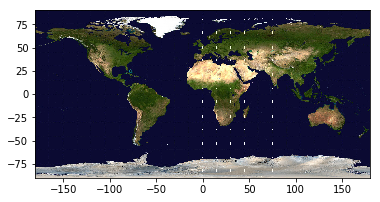

In [58]:
image = plt.imread("earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])

Create your data frame:

In [59]:
df = pd.read_csv("earthquakes_africa.csv")
df.head()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,2780,NaN,1906,8,25,NaN,NaN,NaN,NaN,6.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2789,Tsu,1906,11,20,21.0,0.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN
2,8158,NaN,1909,4,26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2916,NaN,1910,12,13,11.0,37.0,24.0,NaN,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3174,NaN,1921,8,14,13.0,15.0,28.0,NaN,5.9,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [67]:
years = df["YEAR"]
mag = df["EQ_PRIMARY"]
lat = df["LATITUDE"]
long = df["LONGITUDE"]
death = df["DEATHS"]
mag.min()


2.1

Try plotting your earthquakes!
Hint: You will need to use the "LATITUDE" and "LONGITUDE" columns

You will also need xlim and ylim to focus the map on your region. Use the following limits:
- North America: xlim = (-180,-50), ylim = (0,90)
- Central America: xlim = (-100,-70), ylim = (0,25)
- South America: xlim = (-120,-20), ylim = (-60,20)
- Africa: xlim = (-25,50), ylim = (-40,45)
- Pacific: xlim = (80,180), ylim = (-70,30)

(-40, 45)

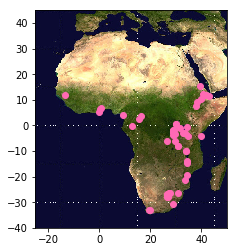

In [61]:
image = plt.imread("earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])
plt.scatter(long, lat, color = "hotpink")
plt.xlim(-25,50)
plt.ylim(-40,45)

(-40, 45)

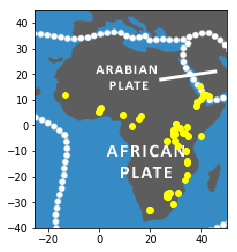

In [62]:
image = plt.imread("plates.png")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])
plt.scatter(long, lat, color = "yellow")
plt.xlim(-25,50)
plt.ylim(-40,45)

Replace your (image = plt.imread("earth.jpg")) code with the following and see what happens:
image = plt.imread("plates.png")

What do you notice?

### Let's add some color (and functions)
Next, you'll need to color code your points based on one of the characteristics in the data frame. 

First, create a function that takes the name of a column and a number of colors and returns list of intermediate values based on the number of colors you specify (these values will be the boundaries for conditionals later on).

(-40, 45)

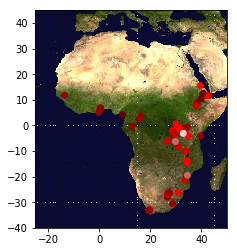

In [63]:
c = [] #Creating an empty list to append the differnt colors we want for each condition
for val in mag:
    if val < 3: #lowest magnitude was 2 and the highest was 7
        c.append([255/255,204/255,204/255]) 
    if val < 4:
        c.append([204/255,102/255,102/255])
    elif val < 5:
        c.append([255/255,0/255,0/255])
    elif val < 6:
        c.append([204/255,0/255,0/255])
    elif val < 7:
        c.append([153/255,0/255,0/255])
    elif val < 8:
        c.append([102/255,0/255,0/255])
    elif val < 9:
        c.append([51/255,0/255,0/255])
image = plt.imread("earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])
plt.scatter(long, lat, color = c) 
plt.xlim(-25,50)
plt.ylim(-40,45)       
        

(-40, 45)

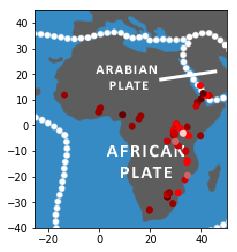

In [65]:
c = []
for val in mag:
    if val < 3:
       c.append([255/255,204/255,204/255])
    if val < 4:
       c.append([204/255,102/255,102/255])
    elif val < 5:
       c.append([255/255,0/255,0/255])
    elif val < 6:
       c.append([204/255,0/255,0/255])
    elif val < 7:
       c.append([153/255,0/255,0/255])
    elif val < 8:
       c.append([102/255,0/255,0/255])
    elif val < 9:
       c.append([51/255,0/255,0/255])
image = plt.imread("plates.png")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])
plt.scatter(long, lat, color = c)
plt.xlim(-25,50)
plt.ylim(-40,45)       

Replace your (image = plt.imread("earth.jpg")) code with the following and see what happens:
image = plt.imread("plates.png")

What do you notice?

### Challenge: 
Change the size of your markers based on a second characteristic

(-40, 45)

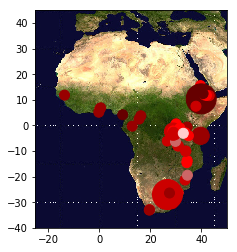

In [64]:
def sizeFunc(column, numSize):
    empty_list = []
    interval = (column.max()- column.min())/numSize
    num_temp = column.min()
    while len(empty_list) < numSize:
        num_temp += interval
        empty_list.append(num_temp)
    return empty_list

sizeFunc(df["DEATHS"], 5)
death = df["DEATHS"]


def Func(column):
    empty_list = sizeFunc(df["DEATHS"], 5)
    sizes = []
    for item in column:
        if item <= empty_list[0]:
            sizes.append(100)
        elif item <= empty_list[1]:
            sizes.append(300)
        elif item <= empty_list[2]:
            sizes.append(500)
        elif item <= empty_list[3]:
            sizes.append(700)
        elif item <= empty_list[4]:
            sizes.append(900)
    return sizes
s = Func(death)
image = plt.imread("earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])
plt.scatter(long, lat, color = c, s = s)
plt.xlim(-25,50)
plt.ylim(-40,45)